In [89]:

import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

In [90]:
bto_df=pd.read_csv("D:\BAP DATASET\HDB BTO\HDB BTO DATA\HDB BTO Processed Data(Final).csv")

In [93]:
bto_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,distance_to_nearest_mall,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0


<h3>BTO Data Cleaning for modelling</h3>

In [94]:
bto_predictive_df=bto_df

In [95]:
bto_predictive_df.dtypes

financial_year                    int64
town                             object
room_type                         int64
min_selling_price                 int64
max_selling_price                 int64
average_selling_price             int64
Latitude                        float64
Longitude                       float64
shopping_mall                    object
distance_to_nearest_mall        float64
num_mall_2km                      int64
hawker                           object
distance_from_nearest_hawker    float64
num_hawker_2km                    int64
distance_from_nearest_park      float64
num_park_2km                      int64
school                           object
school_dist                     float64
num_school_2km                    int64
Remaining_Lease                   int64
Ideal                            object
Predicted_Ideal_Level            object
town_Bukit Batok                  int64
town_Bukit Panjang                int64
town_Choa Chu Kang                int64


In [96]:
bto_predictive_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,distance_to_nearest_mall,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,0.208848,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,0.142507,...,Ideal,Ideal,1,0,0,0,0,0,0,0


In [98]:
bto_predictive_df=bto_predictive_df.drop(["Latitude","Longitude","shopping_mall","num_mall_2km","hawker","num_hawker_2km","num_park_2km","school","num_school_2km"],axis=1)

In [99]:
bto_predictive_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,2008,Punggol,1,82000,107000,94500,0.208848,5.331304,0.776697,0.381141,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,2008,Punggol,2,135000,211000,173000,0.208848,5.331304,0.776697,0.381141,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2008,Punggol,3,223000,327000,275000,0.208848,5.331304,0.776697,0.381141,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,2008,Punggol,4,305000,428000,366500,0.208848,5.331304,0.776697,0.381141,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,2009,Punggol,1,89000,114000,101500,0.208848,5.331304,0.776697,0.381141,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,0.142507,1.441875,1.169541,0.560983,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,2017,Bukit Batok,1,87000,164000,125500,0.142507,1.441875,1.169541,0.560983,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,2017,Bukit Batok,2,171000,246000,208500,0.142507,1.441875,1.169541,0.560983,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,2017,Bukit Batok,3,265000,321000,293000,0.142507,1.441875,1.169541,0.560983,...,Ideal,Ideal,1,0,0,0,0,0,0,0


<h2>Predicting BTO Prices</h2>

### Predicting BTO Maximum Selling Price with Multivariate Linear Regression

In [100]:
bto_predictive_df["remaining_lease"]=99-(2021-bto_predictive_df["financial_year"])

In [101]:
bto_predictive_df=bto_predictive_df.drop(["financial_year"],axis=1)

In [102]:
bto_predictive_df

,town,room_type,min_selling_price,max_selling_price,average_selling_price,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,...,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,remaining_lease
0,Punggol,1,82000,107000,94500,0.208848,5.331304,0.776697,0.381141,86,...,Not Ideal,0,0,0,1,0,0,0,0,86
1,Punggol,2,135000,211000,173000,0.208848,5.331304,0.776697,0.381141,86,...,Not Ideal,0,0,0,1,0,0,0,0,86
2,Punggol,3,223000,327000,275000,0.208848,5.331304,0.776697,0.381141,86,...,Not Ideal,0,0,0,1,0,0,0,0,86
3,Punggol,4,305000,428000,366500,0.208848,5.331304,0.776697,0.381141,86,...,Not Ideal,0,0,0,1,0,0,0,0,86
4,Punggol,1,89000,114000,101500,0.208848,5.331304,0.776697,0.381141,87,...,Not Ideal,0,0,0,1,0,0,0,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Bukit Batok,4,367000,424000,395500,0.142507,1.441875,1.169541,0.560983,93,...,Ideal,1,0,0,0,0,0,0,0,93
235,Bukit Batok,1,87000,164000,125500,0.142507,1.441875,1.169541,0.560983,95,...,Ideal,1,0,0,0,0,0,0,0,95
236,Bukit Batok,2,171000,246000,208500,0.142507,1.441875,1.169541,0.560983,95,...,Ideal,1,0,0,0,0,0,0,0,95
237,Bukit Batok,3,265000,321000,293000,0.142507,1.441875,1.169541,0.560983,95,...,Ideal,1,0,0,0,0,0,0,0,95


In [103]:
bto_dummies_df=pd.get_dummies(bto_predictive_df)

In [104]:
bto_dummies_df

,room_type,min_selling_price,max_selling_price,average_selling_price,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,town_Bukit Batok,...,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Ideal_Ideal,Ideal_Not Ideal,Predicted_Ideal_Level_Ideal,Predicted_Ideal_Level_Not Ideal
0,1,82000,107000,94500,0.208848,5.331304,0.776697,0.381141,86,0,...,0,1,0,0,0,0,0,1,0,1
1,2,135000,211000,173000,0.208848,5.331304,0.776697,0.381141,86,0,...,0,1,0,0,0,0,0,1,0,1
2,3,223000,327000,275000,0.208848,5.331304,0.776697,0.381141,86,0,...,0,1,0,0,0,0,0,1,0,1
3,4,305000,428000,366500,0.208848,5.331304,0.776697,0.381141,86,0,...,0,1,0,0,0,0,0,1,0,1
4,1,89000,114000,101500,0.208848,5.331304,0.776697,0.381141,87,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,4,367000,424000,395500,0.142507,1.441875,1.169541,0.560983,93,1,...,0,0,0,0,0,0,1,0,1,0
235,1,87000,164000,125500,0.142507,1.441875,1.169541,0.560983,95,1,...,0,0,0,0,0,0,1,0,1,0
236,2,171000,246000,208500,0.142507,1.441875,1.169541,0.560983,95,1,...,0,0,0,0,0,0,1,0,1,0
237,3,265000,321000,293000,0.142507,1.441875,1.169541,0.560983,95,1,...,0,0,0,0,0,0,1,0,1,0


In [105]:
bto_dummies_df.dtypes

room_type                            int64
min_selling_price                    int64
max_selling_price                    int64
average_selling_price                int64
distance_to_nearest_mall           float64
distance_from_nearest_hawker       float64
distance_from_nearest_park         float64
school_dist                        float64
Remaining_Lease                      int64
town_Bukit Batok                     int64
town_Bukit Panjang                   int64
town_Choa Chu Kang                   int64
town_Punggol                         int64
town_Sembawang                       int64
town_Sengkang                        int64
town_Woodlands                       int64
town_Yishun                          int64
remaining_lease                      int64
town_Bukit Batok                     uint8
town_Bukit Panjang                   uint8
town_Choa Chu Kang                   uint8
town_Punggol                         uint8
town_Sembawang                       uint8
town_Sengka

In [106]:

x = bto_dummies_df.drop(['max_selling_price','min_selling_price','average_selling_price'],axis=1)
#To avoid model overfitting, which happens if the target parameter 'Salary' is 
#not removed from training data 

y = bto_dummies_df['max_selling_price']

In [107]:
x


,room_type,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,...,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Ideal_Ideal,Ideal_Not Ideal,Predicted_Ideal_Level_Ideal,Predicted_Ideal_Level_Not Ideal
0,1,0.208848,5.331304,0.776697,0.381141,86,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,2,0.208848,5.331304,0.776697,0.381141,86,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,3,0.208848,5.331304,0.776697,0.381141,86,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
3,4,0.208848,5.331304,0.776697,0.381141,86,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,1,0.208848,5.331304,0.776697,0.381141,87,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,4,0.142507,1.441875,1.169541,0.560983,93,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
235,1,0.142507,1.441875,1.169541,0.560983,95,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
236,2,0.142507,1.441875,1.169541,0.560983,95,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
237,3,0.142507,1.441875,1.169541,0.560983,95,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [108]:
#Performing the split (Training - 80%, Testing - 20%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

print("Number of training samples:",x_train.shape[0])
print("Number of test samples :", x_test.shape[0])

Number of training samples: 191
Number of test samples : 48


In [109]:
x_train.head()

,room_type,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,...,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Ideal_Ideal,Ideal_Not Ideal,Predicted_Ideal_Level_Ideal,Predicted_Ideal_Level_Not Ideal
127,2,0.069869,3.753312,0.920316,0.411734,88,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
223,1,0.188389,0.768135,0.538986,0.461197,96,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
209,3,0.188389,0.768135,0.538986,0.461197,91,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
229,3,0.142507,1.441875,1.169541,0.560983,92,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
65,2,0.215361,1.466916,0.971619,0.429768,86,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [110]:
y_train.head()

127    232000
223    132000
209    320000
229    344000
65     164000
Name: max_selling_price, dtype: int64

In [111]:
#Creating Linear Regressor Object
lr = LinearRegression()

#Fitting model using x and y attributes
lr.fit(x_train, y_train)

# #Making Prediction such that y_hat gives an array of Target Value (Salary)
y_hat = lr.predict(x_train)
print("The first 5 predictied max selling price: ", y_hat[0:5])

The first 5 predictied max selling price:  [226824.66813218 113911.65994464 278896.90146816 323427.40199692
 186497.08277961]


In [112]:
#Finding intercept 'a' and slope 'b'
print("The Slope is: ", lr.coef_)
print("The Intercept is: ", lr.intercept_)

The Slope is:  [ 87059.87228053    413.96214208   1283.93574947   5886.37333711
    612.41732904    913.45030375  16844.14107795    309.65147021
 -16243.95725487   7614.35207282 -19344.00509124  15036.89314432
  -2018.83472822  -2198.24069097    913.45030375  16844.14107795
    309.65147021 -16243.95725487   7614.35207282 -19344.00509124
  15036.89314432  -2018.83472822  -2198.24069097  -7614.35207282
   7614.35207282  -7614.35207282   7614.35207282]
The Intercept is:  -133424.8239678393


In [113]:
#Having established a baseline model, we can predict Salaries in the test set

y_hat=lr.predict(x_test) #Predicting the training data
y_hat

array([119533.11718168, 408252.01512328, 200971.53222517, 173256.11245462,
       367783.6743562 , 169221.29373277, 345548.95640817,  78888.63774404,
       404598.21390827, 158423.46494816, 339850.81193926, 434218.28664983,
       432391.38604232, 169384.86859321, 148899.29888919,  74853.8190222 ,
       196690.32887109, 321192.14284275,  89469.02388228, 315711.44102022,
       284377.60329069, 399117.51208574, 341514.13768633, 341895.15519315,
       294711.60479668, 310230.73919769, 343504.61315428, 377058.93280826,
       234132.27056222, 206592.98946222, 413732.71694581, 372636.97403967,
       397290.61147823, 195631.58581716, 241829.53601367, 341677.71254677,
       235959.17116973, 108571.71353663, 199144.63161766, 410078.91573079,
       369751.33037823, 343341.03829384, 163904.16677069, 139764.79585165,
       425083.78361229, 136110.99463663, 249354.58109009, 371578.23098574])

In [114]:
#Evaluation with MSE
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error is: ", mse)

Mean Squared Error is:  5485109568.815368


In [115]:
#Distribution plot for the 20% test data
##Predicting the first 5 values
y_hat_test = lr.predict(x_test)
print("First 5 predictios: ", y_hat_test[0:5])

First 5 predictios:  [119533.11718168 408252.01512328 200971.53222517 173256.11245462
 367783.6743562 ]


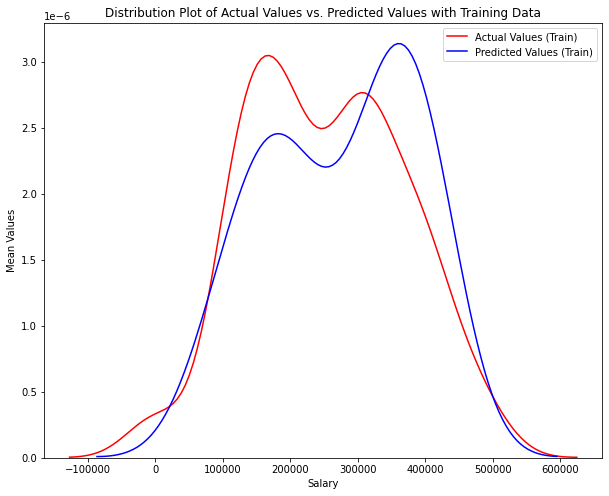

In [116]:
#Defining function for Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

#Distribution plot for the 80% train data
Title = 'Distribution Plot of Actual Values vs. Predicted Values with Training Data'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [117]:
lr.predict(x)

array([152942.76312563, 240002.63540616, 327062.5076867 , 414122.37996723,
       154769.66373314, 241829.53601367, 328889.40829421, 415949.28057474,
       243656.43662118, 330716.30890172, 417776.18118225, 158423.46494816,
       245483.33722869, 332543.20950923, 419603.08178976, 160250.36555567,
       247310.2378362 , 334370.11011674, 421429.98239727, 162077.26616318,
       249137.13844371, 336197.01072424, 423256.88300478, 163904.16677069,
       250964.03905122, 338023.91133175, 425083.78361229, 165731.0673782 ,
       252790.93965873, 339850.81193926, 426910.6842198 , 167557.96798571,
       254617.84026624, 341677.71254677, 428737.58482731, 169384.86859321,
       256444.74087375, 343504.61315428, 430564.48543481, 171211.76920072,
       258271.64148126, 345331.51376179, 432391.38604232, 173038.66980823,
       260098.54208877, 347158.4143693 , 434218.28664983, 105976.65537554,
       193036.52765607, 280096.39993661, 107803.55598305, 194863.42826358,
       281923.30054411, 1

In [118]:
#Evaluation with MSE
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",round(mean_absolute_error(y_test, y_hat),2))

from sklearn.metrics import r2_score
print("R-Squared:",round(r2_score(y_test, y_hat),2))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:",round(mean_squared_error(y_test, y_hat),2))

Mean Absolute Error 41585.99
R-Squared: 0.69
Root Mean Squared Error: 5485109568.82


In [123]:
bto_predictive_df["Predicted Max Selling Price"]=lr.predict(x)

In [124]:
bto_predictive_df

,town,room_type,min_selling_price,max_selling_price,average_selling_price,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,...,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,remaining_lease,Predicted Max Selling Price
0,Punggol,1,82000,107000,94500,0.208848,5.331304,0.776697,0.381141,86,...,0,0,0,1,0,0,0,0,86,152942.763126
1,Punggol,2,135000,211000,173000,0.208848,5.331304,0.776697,0.381141,86,...,0,0,0,1,0,0,0,0,86,240002.635406
2,Punggol,3,223000,327000,275000,0.208848,5.331304,0.776697,0.381141,86,...,0,0,0,1,0,0,0,0,86,327062.507687
3,Punggol,4,305000,428000,366500,0.208848,5.331304,0.776697,0.381141,86,...,0,0,0,1,0,0,0,0,86,414122.379967
4,Punggol,1,89000,114000,101500,0.208848,5.331304,0.776697,0.381141,87,...,0,0,0,1,0,0,0,0,87,154769.663733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Bukit Batok,4,367000,424000,395500,0.142507,1.441875,1.169541,0.560983,93,...,1,0,0,0,0,0,0,0,93,412314.174885
235,Bukit Batok,1,87000,164000,125500,0.142507,1.441875,1.169541,0.560983,95,...,1,0,0,0,0,0,0,0,95,154788.359258
236,Bukit Batok,2,171000,246000,208500,0.142507,1.441875,1.169541,0.560983,95,...,1,0,0,0,0,0,0,0,95,241848.231539
237,Bukit Batok,3,265000,321000,293000,0.142507,1.441875,1.169541,0.560983,95,...,1,0,0,0,0,0,0,0,95,328908.103819


In [126]:
bto_df=bto_df.join(bto_predictive_df[["Predicted Max Selling Price"]])

### Predicting BTO Minimum Selling Price with Multivariate Linear Regression

In [127]:

x = bto_dummies_df.drop(['max_selling_price','min_selling_price','average_selling_price'],axis=1)
#To avoid model overfitting, which happens if the target parameter 'Salary' is 
#not removed from training data 

y = bto_df['min_selling_price']

In [128]:
#Performing the split (Training - 80%, Testing - 20%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

print("Number of training samples:",x_train.shape[0])
print("Number of test samples :", x_test.shape[0])

Number of training samples: 191
Number of test samples : 48


In [129]:
x_train.head()

,room_type,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,...,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Ideal_Ideal,Ideal_Not Ideal,Predicted_Ideal_Level_Ideal,Predicted_Ideal_Level_Not Ideal
127,2,0.069869,3.753312,0.920316,0.411734,88,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
223,1,0.188389,0.768135,0.538986,0.461197,96,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
209,3,0.188389,0.768135,0.538986,0.461197,91,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
229,3,0.142507,1.441875,1.169541,0.560983,92,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
65,2,0.215361,1.466916,0.971619,0.429768,86,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [130]:
y_train.head()

127    122000
223     75000
209    252000
229    259000
65     116000
Name: min_selling_price, dtype: int64

In [131]:
#Creating Linear Regressor Object
lr = LinearRegression()

#Fitting model using x and y attributes
lr.fit(x_train, y_train)

# #Making Prediction such that y_hat gives an array of Target Value (Salary)
y_hat = lr.predict(x_train)
print("The first 5 predictied max selling price: ", y_hat[0:5])

The first 5 predictied max selling price:  [151462.36032472  85299.42218982 219317.67347713 250242.4148852
 135722.83472699]


In [132]:
#Finding intercept 'a' and slope 'b'
print("The Slope is: ", lr.coef_)
print("The Intercept is: ", lr.intercept_)

The Slope is:  [ 72373.56374236    491.44453778   -569.21030931   3027.7673868
   1055.51186695   1072.88761974  12388.96102461   1720.0298
  -8104.28020182   4273.20746749 -11802.03108281   4609.0254657
  -1888.61584158  -1196.2966316    1072.88761974  12388.96102461
   1720.0298      -8104.28020182   4273.20746749 -11802.03108281
   4609.0254657   -1888.61584158  -1196.2966316   -4273.20746749
   4273.20746749  -4273.20746749   4273.20746749]
The Intercept is:  -183903.63086687724


In [133]:
#Having established a baseline model, we can predict Salaries in the test set

y_hat=lr.predict(x_test) #Predicting the training data
y_hat

array([ 86952.79861896, 304792.58876738, 157672.98593218, 139343.09821167,
       293837.01245897, 131145.03052154, 281944.45045692,  58386.43351137,
       300501.03828841,  96358.71989268, 249688.94833535, 330645.61303566,
       328499.83779617, 109233.37132959,  89817.67277977,  50188.36582124,
       144350.15838544, 232419.02502502,  67354.56773712, 225981.69930657,
       225754.99919558, 294063.71256996, 273746.38276679, 277652.89997795,
       229598.37356472, 219544.37358811, 253980.49881432, 299781.93936708,
       160045.46128265, 159326.36236132, 311229.91448584, 291243.06110966,
       291917.93733048, 146451.71092442, 164440.73315608, 251834.72357484,
       162191.23652214,  74078.14718205, 155527.2106927 , 306938.36400687,
       291198.83840914, 275892.15800627, 102796.04561114,  79088.79658235,
       319916.73683823,  74797.24610338, 198842.01051713, 293344.61364863])

In [134]:
#Evaluation with MSE
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error is: ", mse)

Mean Squared Error is:  2825488069.3209667


In [135]:
#Distribution plot for the 20% test data
##Predicting the first 5 values
y_hat_test = lr.predict(x_test)
print("First 5 predictios: ", y_hat_test[0:5])

First 5 predictios:  [ 86952.79861896 304792.58876738 157672.98593218 139343.09821167
 293837.01245897]


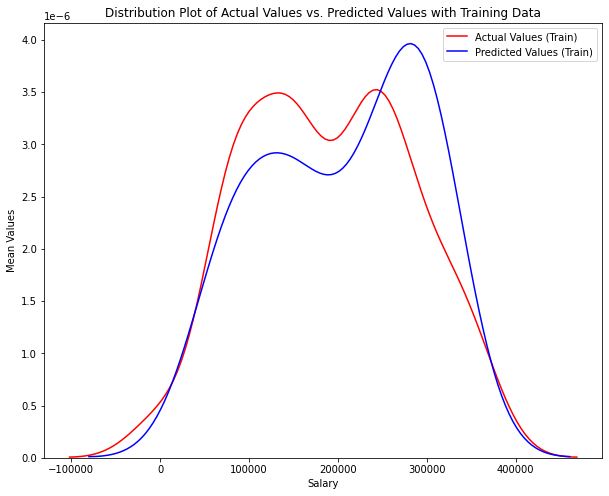

In [136]:
#Defining function for Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

#Distribution plot for the 80% train data
Title = 'Distribution Plot of Actual Values vs. Predicted Values with Training Data'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [137]:
lr.predict(x)

array([ 89921.39417423, 162294.9579166 , 234668.52165896, 307042.08540133,
        92067.16941372, 164440.73315608, 236814.29689845, 309187.86064081,
       166586.50839557, 238960.07213793, 311333.63588029,  96358.71989268,
       168732.28363505, 241105.84737741, 313479.41111978,  98504.49513217,
       170878.05887453, 243251.6226169 , 315625.18635926, 100650.27037165,
       173023.83411402, 245397.39785638, 317770.96159875, 102796.04561114,
       175169.6093535 , 247543.17309587, 319916.73683823, 104941.82085062,
       177315.38459299, 249688.94833535, 322062.51207772, 107087.59609011,
       179461.15983247, 251834.72357484, 324208.2873172 , 109233.37132959,
       181606.93507196, 253980.49881432, 326354.06255669, 111379.14656908,
       183752.71031144, 256126.27405381, 328499.83779617, 113524.92180856,
       185898.48555093, 258272.04929329, 330645.61303566,  67685.04416411,
       140058.60790647, 212432.17164884,  69830.81940359, 142204.38314596,
       214577.94688832,  

In [138]:
#Evaluation with MSE
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",round(mean_absolute_error(y_test, y_hat),2))

from sklearn.metrics import r2_score
print("R-Squared:",round(r2_score(y_test, y_hat),2))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:",round(mean_squared_error(y_test, y_hat),2))

Mean Absolute Error 26600.49
R-Squared: 0.74
Root Mean Squared Error: 2825488069.32


In [139]:
bto_predictive_df["Predicted Min Selling Price"]=lr.predict(x)

In [140]:
bto_df=bto_df.join(bto_predictive_df[["Predicted Min Selling Price"]])

In [141]:
bto_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,distance_to_nearest_mall,...,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Predicted Max Selling Price,Predicted Min Selling Price
0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,0,1,0,0,0,0,152942.763126,89921.394174
1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,0,1,0,0,0,0,240002.635406,162294.957917
2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,0,1,0,0,0,0,327062.507687,234668.521659
3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,0,1,0,0,0,0,414122.379967,307042.085401
4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,0,1,0,0,0,0,154769.663733,92067.169414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,0.142507,...,1,0,0,0,0,0,0,0,412314.174885,324761.753867
235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,0.142507,...,1,0,0,0,0,0,0,0,154788.359258,111932.613119
236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,0.142507,...,1,0,0,0,0,0,0,0,241848.231539,184306.176861
237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,0.142507,...,1,0,0,0,0,0,0,0,328908.103819,256679.740604


### Predicting BTO Average Selling Price with Multivariate Linear Regression

In [142]:

x = bto_dummies_df.drop(['max_selling_price','min_selling_price','average_selling_price'],axis=1)
#To avoid model overfitting, which happens if the target parameter 'Salary' is 
#not removed from training data 

y = bto_df['average_selling_price']

In [143]:
#Performing the split (Training - 80%, Testing - 20%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

print("Number of training samples:",x_train.shape[0])
print("Number of test samples :", x_test.shape[0])

Number of training samples: 191
Number of test samples : 48


In [144]:
x_train.head()

,room_type,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,school_dist,Remaining_Lease,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,...,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Ideal_Ideal,Ideal_Not Ideal,Predicted_Ideal_Level_Ideal,Predicted_Ideal_Level_Not Ideal
127,2,0.069869,3.753312,0.920316,0.411734,88,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
223,1,0.188389,0.768135,0.538986,0.461197,96,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
209,3,0.188389,0.768135,0.538986,0.461197,91,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
229,3,0.142507,1.441875,1.169541,0.560983,92,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
65,2,0.215361,1.466916,0.971619,0.429768,86,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [145]:
y_train.head()

127    177000
223    103500
209    286000
229    301500
65     140000
Name: average_selling_price, dtype: int64

In [146]:
#Creating Linear Regressor Object
lr = LinearRegression()

#Fitting model using x and y attributes
lr.fit(x_train, y_train)

# #Making Prediction such that y_hat gives an array of Target Value (Salary)
y_hat = lr.predict(x_train)
print("The first 5 predictied max selling price: ", y_hat[0:5])

The first 5 predictied max selling price:  [189143.51422845  99605.54106723 249107.28747264 286834.90844106
 161109.9587533 ]


In [147]:
#Finding intercept 'a' and slope 'b'
print("The Slope is: ", lr.coef_)
print("The Intercept is: ", lr.intercept_)

The Slope is:  [ 79716.71801145    452.70333993    357.36272008   4457.07036195
    833.964598      993.16896175  14616.55105128   1014.8406351
 -12174.11872834   5943.77977015 -15573.01808702   9822.95930501
  -1953.7252849   -1697.26866129    993.16896175  14616.55105128
   1014.8406351  -12174.11872834   5943.77977015 -15573.01808702
   9822.95930501  -1953.7252849   -1697.26866129  -5943.77977015
   5943.77977015  -5943.77977015   5943.77977015]
The Intercept is:  -158664.22741735817


In [148]:
#Having established a baseline model, we can predict Salaries in the test set

y_hat=lr.predict(x_test) #Predicting the training data
y_hat

array([103242.95790032, 356522.30194533, 179322.25907868, 156299.60533314,
       330810.34340759, 150183.16212716, 313746.70343254,  68637.53562771,
       352549.62609834, 127391.09242042, 294769.88013731, 382431.94984274,
       380445.61191925, 139309.1199614 , 119358.48583448,  62521.09242172,
       170520.24362827, 276805.58393388,  78411.7958097 , 270846.57016339,
       255066.30124313, 346590.61232785, 307630.26022656, 309774.02758555,
       262154.9891807 , 264887.5563929 , 298742.5559843 , 338420.43608767,
       197088.86592244, 182959.67591177, 362481.31571582, 331940.01757466,
       344604.27440435, 171041.64837079, 203135.13458488, 296756.2180608 ,
       199075.20384593,  91324.93035934, 177335.92115518, 358508.63986883,
       330475.08439369, 309616.59815006, 133350.10619091, 109426.796217  ,
       372500.26022526, 105454.12037   , 224098.29580361, 332461.42231718])

In [149]:
#Evaluation with MSE
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error is: ", mse)

Mean Squared Error is:  3912701503.982586


In [150]:
#Distribution plot for the 20% test data
##Predicting the first 5 values
y_hat_test = lr.predict(x_test)
print("First 5 predictios: ", y_hat_test[0:5])

First 5 predictios:  [103242.95790032 356522.30194533 179322.25907868 156299.60533314
 330810.34340759]


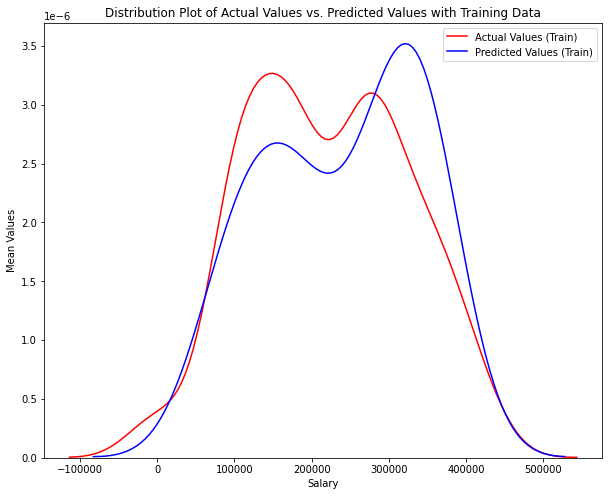

In [151]:
#Defining function for Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

#Distribution plot for the 80% train data
Title = 'Distribution Plot of Actual Values vs. Predicted Values with Training Data'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [152]:
lr.predict(x)

array([121432.07864993, 201148.79666138, 280865.51467283, 360582.23268428,
       123418.41657343, 203135.13458488, 282851.85259633, 362568.57060778,
       205121.47250837, 284838.19051982, 364554.90853127, 127391.09242042,
       207107.81043187, 286824.52844332, 366541.24645477, 129377.43034392,
       209094.14835537, 288810.86636682, 368527.58437827, 131363.76826742,
       211080.48627886, 290797.20429031, 370513.92230176, 133350.10619091,
       213066.82420236, 292783.54221381, 372500.26022526, 135336.44411441,
       215053.16212586, 294769.88013731, 374486.59814876, 137322.78203791,
       217039.50004936, 296756.2180608 , 376472.93607225, 139309.1199614 ,
       219025.83797285, 298742.5559843 , 378459.27399575, 141295.4578849 ,
       221012.17589635, 300728.8939078 , 380445.61191925, 143281.7958084 ,
       222998.51381985, 302715.2318313 , 382431.94984274,  86830.84976982,
       166547.56778127, 246264.28579272,  88817.18769332, 168533.90570477,
       248250.62371622,  

In [153]:
#Evaluation with MSE
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",round(mean_absolute_error(y_test, y_hat),2))

from sklearn.metrics import r2_score
print("R-Squared:",round(r2_score(y_test, y_hat),2))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:",round(mean_squared_error(y_test, y_hat),2))

Mean Absolute Error 32799.33
R-Squared: 0.72
Root Mean Squared Error: 3912701503.98


In [154]:
bto_predictive_df["Predicted Avg Selling Price"]=lr.predict(x)

In [155]:
bto_df=bto_df.join(bto_predictive_df[["Predicted Avg Selling Price"]])

In [156]:
bto_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,distance_to_nearest_mall,...,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Predicted Max Selling Price,Predicted Min Selling Price,Predicted Avg Selling Price
0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,152942.763126,89921.394174,121432.078650
1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,240002.635406,162294.957917,201148.796661
2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,327062.507687,234668.521659,280865.514673
3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,414122.379967,307042.085401,360582.232684
4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,154769.663733,92067.169414,123418.416573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,412314.174885,324761.753867,368537.964376
235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,154788.359258,111932.613119,133360.486189
236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,241848.231539,184306.176861,213077.204200
237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,328908.103819,256679.740604,292793.922212


### Predicting Ideal BTO Flat for raising a child using Decision Tree

<h4>Identifying Ideal Level for raising a child</h4>

In [52]:
#Predicting Ideal flat for raising a child

In [53]:
temp_df=bto_df

In [54]:
child_df=bto_df[["school_dist","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park"]]

In [55]:
#Setting metrics for Ideal flat for raising a child

In [56]:
child_df.dtypes

school_dist                     float64
distance_to_nearest_mall        float64
distance_from_nearest_hawker    float64
distance_from_nearest_park      float64
dtype: object

In [57]:
temp_df['Ideal']=0
for i in range(len(temp_df)):
    if (temp_df["school_dist"][i]>5 or temp_df["distance_from_nearest_hawker"][i]>5 or temp_df["distance_to_nearest_mall"][i]>5 or temp_df["distance_from_nearest_park"][i]>5)==True:
        temp_df["Ideal"][i]="Not Ideal"
    elif ( temp_df["school_dist"][i]<=1.0 or temp_df["distance_from_nearest_hawker"][i]<=1.0 or temp_df["distance_to_nearest_mall"][i]<=1.0 or temp_df["distance_from_nearest_park"][i]<=1.0)==True:
        temp_df["Ideal"][i]="Ideal"
    else:
        temp_df["Ideal"][i]="Half-Ideal"
    
    

<ipython-input-57-876a7a1c5e29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Ideal"][i]="Not Ideal"
C:\Users\65983\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-57-876a7a1c5e29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Ideal"][i]="Ideal"


<h4> Model:Decision Tree</h4>

In [58]:
features = ["school_dist","distance_to_nearest_mall","distance_from_nearest_hawker","distance_from_nearest_park"]
df_x = temp_df[features]
df_y = temp_df['Ideal']

df_x.head()
df_y.head()

0    Not Ideal
1    Not Ideal
2    Not Ideal
3    Not Ideal
4    Not Ideal
Name: Ideal, dtype: object

In [59]:
print( set(df_x) )
print( set(df_y) )

{'distance_from_nearest_hawker', 'school_dist', 'distance_to_nearest_mall', 'distance_from_nearest_park'}
{'Not Ideal', 'Ideal'}


In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.20, # 20% Testing Data
                                                    random_state=10)

display(x_train.head())
display(y_train.head())


,school_dist,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park
172,0.513632,0.102254,4.683534,0.615794
120,0.411734,0.069869,3.753312,0.920316
49,0.526591,0.172488,4.646385,0.590856
1,0.381141,0.208848,5.331304,0.776697
2,0.381141,0.208848,5.331304,0.776697


172        Ideal
120        Ideal
49         Ideal
1      Not Ideal
2      Not Ideal
Name: Ideal, dtype: object

In [61]:
from sklearn.tree import DecisionTreeClassifier

ideal_dtree=DecisionTreeClassifier(criterion="entropy") #entropy--> KPI-->measures how chaotic the data is

ideal_dtree.fit(x_train,y_train)

print("Depth of Tree",ideal_dtree.max_depth)   #must control max depth--> or else it will keep splitting-->overfitting

Depth of Tree None


[Text(418.5, 407.70000000000005, 'X[2] <= 5.007\nentropy = 0.75\nsamples = 191\nvalue = [150, 41]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 150\nvalue = [150, 0]'),
 Text(627.75, 135.89999999999998, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41]')]

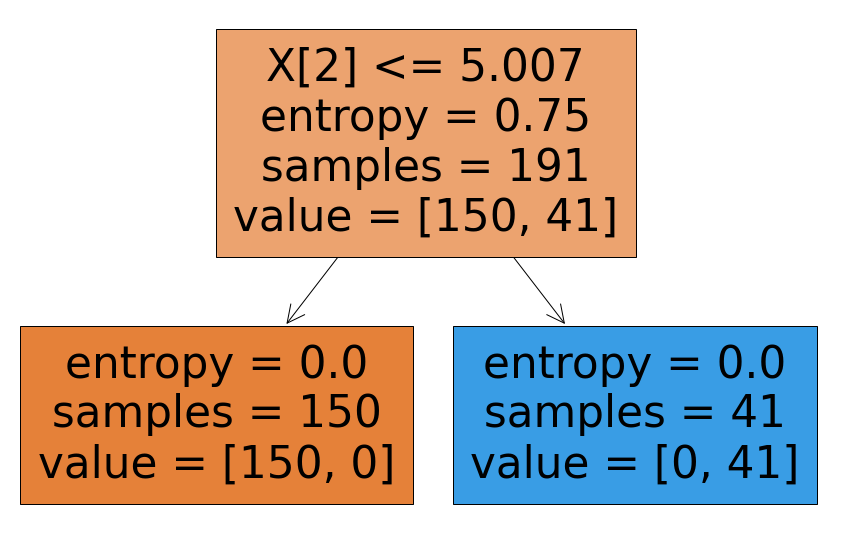

In [62]:
from sklearn import tree
from matplotlib.pyplot import figure

figure(figsize=(15,10))
tree.plot_tree(ideal_dtree, filled=True, impurity=True)


In [63]:
display(df_x)

ideal_dtree.predict(df_x)

,school_dist,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park
0,0.381141,0.208848,5.331304,0.776697
1,0.381141,0.208848,5.331304,0.776697
2,0.381141,0.208848,5.331304,0.776697
3,0.381141,0.208848,5.331304,0.776697
4,0.381141,0.208848,5.331304,0.776697
...,...,...,...,...
234,0.560983,0.142507,1.441875,1.169541
235,0.560983,0.142507,1.441875,1.169541
236,0.560983,0.142507,1.441875,1.169541
237,0.560983,0.142507,1.441875,1.169541


array(['Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal', 'Not Ideal',
       'Not Ideal', 'Not Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal',
       'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal',
       'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal',
       'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal',
       'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal', 'Ideal',
   

In [64]:
predicted_y=ideal_dtree.predict(df_x)

In [65]:
numpy_array=np.array(predicted_y)
y_hat_df = pd.DataFrame(numpy_array)

In [66]:
merged_actual_predicted=df_x.join(temp_df[["Ideal"]]).join(y_hat_df)

In [67]:
merged_actual_predicted

,school_dist,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,Ideal,0
0,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
1,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
2,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
3,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
4,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
...,...,...,...,...,...,...
234,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
235,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
236,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
237,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal


In [68]:
merged_actual_predicted=merged_actual_predicted.rename(columns={0: "Predicted_Ideal_Level"})

In [69]:
merged_actual_predicted

,school_dist,distance_to_nearest_mall,distance_from_nearest_hawker,distance_from_nearest_park,Ideal,Predicted_Ideal_Level
0,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
1,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
2,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
3,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
4,0.381141,0.208848,5.331304,0.776697,Not Ideal,Not Ideal
...,...,...,...,...,...,...
234,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
235,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
236,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal
237,0.560983,0.142507,1.441875,1.169541,Ideal,Ideal


In [71]:
temp_df

,Unnamed: 0,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0


In [72]:
full_results = ideal_dtree.predict(x_test)
print("Full tree predictions:")
print(full_results)

Full tree predictions:
['Not Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal'
 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal'
 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal'
 'Ideal' 'Not Ideal' 'Ideal' 'Ideal' 'Not Ideal' 'Ideal' 'Not Ideal'
 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal' 'Ideal'
 'Ideal' 'Not Ideal' 'Ideal' 'Not Ideal' 'Ideal' 'Ideal']


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,full_results))

              precision    recall  f1-score   support

       Ideal       1.00      1.00      1.00        42
   Not Ideal       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [74]:
print("Full tree accuracy", ideal_dtree.score(x_test, y_test))

Full tree accuracy 1.0


In [75]:
bto_df

,Unnamed: 0,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0


In [76]:
temp_df

,Unnamed: 0,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,...,Ideal,Predicted_Ideal_Level,town_Bukit Batok,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun
0,0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
1,1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
2,2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
3,3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
4,4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,...,Not Ideal,Not Ideal,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
235,235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
236,236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0
237,237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,...,Ideal,Ideal,1,0,0,0,0,0,0,0


In [157]:
bto_df.to_csv(r"D:\BAP DATASET\HDB BTO\HDB BTO DATA\HDB BTO Processed Data(Final).csv")

In [158]:
bto_df

,financial_year,town,room_type,min_selling_price,max_selling_price,average_selling_price,Latitude,Longitude,shopping_mall,distance_to_nearest_mall,...,town_Bukit Panjang,town_Choa Chu Kang,town_Punggol,town_Sembawang,town_Sengkang,town_Woodlands,town_Yishun,Predicted Max Selling Price,Predicted Min Selling Price,Predicted Avg Selling Price
0,2008,Punggol,1,82000,107000,94500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,152942.763126,89921.394174,121432.078650
1,2008,Punggol,2,135000,211000,173000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,240002.635406,162294.957917,201148.796661
2,2008,Punggol,3,223000,327000,275000,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,327062.507687,234668.521659,280865.514673
3,2008,Punggol,4,305000,428000,366500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,414122.379967,307042.085401,360582.232684
4,2009,Punggol,1,89000,114000,101500,1.404547,103.902052,Waterway Point,0.208848,...,0,0,1,0,0,0,0,154769.663733,92067.169414,123418.416573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2015,Bukit Batok,4,367000,424000,395500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,412314.174885,324761.753867,368537.964376
235,2017,Bukit Batok,1,87000,164000,125500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,154788.359258,111932.613119,133360.486189
236,2017,Bukit Batok,2,171000,246000,208500,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,241848.231539,184306.176861,213077.204200
237,2017,Bukit Batok,3,265000,321000,293000,1.349034,103.749590,West Mall,0.142507,...,0,0,0,0,0,0,0,328908.103819,256679.740604,292793.922212


In [88]:
temp_df.dtypes

Unnamed: 0                        int64
financial_year                    int64
town                             object
room_type                         int64
min_selling_price                 int64
max_selling_price                 int64
average_selling_price             int64
Latitude                        float64
Longitude                       float64
shopping_mall                    object
distance_to_nearest_mall        float64
num_mall_2km                      int64
hawker                           object
distance_from_nearest_hawker    float64
num_hawker_2km                    int64
distance_from_nearest_park      float64
num_park_2km                      int64
school                           object
school_dist                     float64
num_school_2km                    int64
Remaining_Lease                   int64
Ideal                            object
Predicted_Ideal_Level            object
town_Bukit Batok                  int64
town_Bukit Panjang                int64
